In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [16]:
def open_tboard_csv(filename, key, batch_size = 256, dataset_size = 40000):
    # File Columns:
    # wall_time, step, value
    float_rdr = []
    with open(filename, "r") as f:
        reader = csv.reader(f)
        head = next(reader)
        data = [row for row in reader]
    float_rdr = np.asarray(data, dtype = float)
    # float_rdr = np.array(float_rdr)
    if key == "time":
        # time in fraction of hours
        ret = ((float_rdr[:,0] - float_rdr[0,0])/3600.0) 
    elif key == "step":
        ret = float_rdr[:,1]
    elif key == "epoch":
        ret = float_rdr[:,1] * float(batch_size/dataset_size)
    else:
        # this returns accuracy
        ret = float_rdr[:,2]
    return ret

## mnist mlp accuracy w/o mix precision

In [23]:
x_axes = "step"

# Accuracy 
float32_acc_x = open_tboard_csv("data/mnist-float32-accuracy.csv", x_axes)
float32_acc_y = open_tboard_csv("data/mnist-float32-accuracy.csv","accuracy")

mix_acc_x = open_tboard_csv("data/mnist-mix-accuracy.csv", x_axes)
mix_acc_y = open_tboard_csv("data/mnist-mix-accuracy.csv","accuracy")

Text(0, 0.5, 'Accuracy')

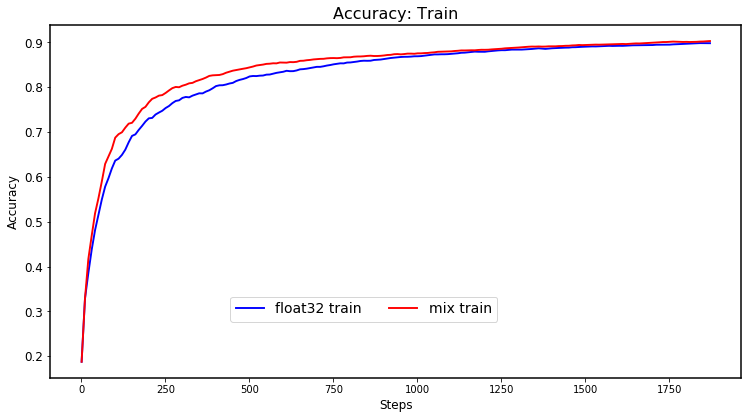

In [26]:
fig = plt.figure(figsize=(12,7))

my_fontsize=12
xlimit = 3600
    
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax.spines['right'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

plt.yticks(fontsize=my_fontsize)

plt.title('Accuracy: Train', fontsize=16)
plt.xlabel('Steps', fontsize=my_fontsize)

plt.plot(float32_acc_x, float32_acc_y, color = "Blue", linewidth=1.9, label = "float32 train")
plt.plot(mix_acc_x, mix_acc_y, color = "Red", linewidth=1.9, label = "mix train")

plt.legend(bbox_to_anchor=(0.25, 0.25), ncol=2, fontsize=14)
plt.ylabel('Accuracy', fontsize=12)

Text(0, 0.5, 'Accuracy')

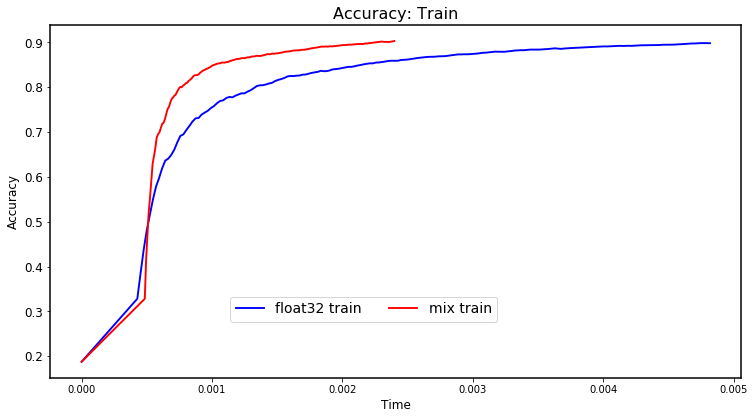

In [28]:
x_axes = "time"

# Accuracy 
float32_acc_x = open_tboard_csv("data/mnist-float32-accuracy.csv", x_axes)
float32_acc_y = open_tboard_csv("data/mnist-float32-accuracy.csv","accuracy")

mix_acc_x = open_tboard_csv("data/mnist-mix-accuracy.csv", x_axes)
mix_acc_y = open_tboard_csv("data/mnist-mix-accuracy.csv","accuracy")

fig = plt.figure(figsize=(12,7))

my_fontsize=12
xlimit = 3600
    
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax.spines['right'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

plt.yticks(fontsize=my_fontsize)

plt.title('Accuracy: Train', fontsize=16)
plt.xlabel('Time', fontsize=my_fontsize)

plt.plot(float32_acc_x, float32_acc_y, color = "Blue", linewidth=1.9, label = "float32 train")
plt.plot(mix_acc_x, mix_acc_y, color = "Red", linewidth=1.9, label = "mix train")

plt.legend(bbox_to_anchor=(0.25, 0.25), ncol=2, fontsize=14)
plt.ylabel('Accuracy', fontsize=12)